### Which ML-algorithms are used?
### Regression Problem
Lineare Regression  <br>
DecisionTreeRegressor <br>
Support Vector Regression (SVR)<br>
Random Forest (RandomForestRegressor)<br>
KNeighborsClassifier (Knn)<br>
GradientBoostingRegressor

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

### Dataset
california_housing from sklearn <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [2]:
from sklearn.datasets import fetch_california_housing #(20000 Datensätze)

In [3]:
california  = fetch_california_housing()
X = california.data
y = california.target

In [4]:
k=10 #Number of Folds
kf = KFold(n_splits=k, shuffle=True, random_state=42) 
#kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [5]:
print("Features:")
print(california.feature_names)
print("Target:")
print(california.target)

Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


### Show fold distribution

In [6]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print()

Fold 1
Train Index: [    0     1     2 ... 20637 20638 20639]
Test Index: [    3    31    34 ... 20617 20633 20635]

Fold 2
Train Index: [    1     2     3 ... 20636 20637 20639]
Test Index: [    0     6    17 ... 20604 20610 20638]

Fold 3
Train Index: [    0     1     2 ... 20637 20638 20639]
Test Index: [    8    29    30 ... 20612 20627 20628]

Fold 4
Train Index: [    0     1     2 ... 20637 20638 20639]
Test Index: [    5    14    20 ... 20606 20630 20636]

Fold 5
Train Index: [    0     1     2 ... 20637 20638 20639]
Test Index: [    7    15    23 ... 20596 20597 20609]

Fold 6
Train Index: [    0     1     3 ... 20637 20638 20639]
Test Index: [    2    10    21 ... 20613 20615 20620]

Fold 7
Train Index: [    0     1     2 ... 20637 20638 20639]
Test Index: [    4    12    18 ... 20624 20629 20631]

Fold 8
Train Index: [    0     2     3 ... 20637 20638 20639]
Test Index: [    1    26    44 ... 20592 20619 20634]

Fold 9
Train Index: [    0     1     2 ... 20637 20638 20639]
Te

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
linreg = LinearRegression()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
gb_reg = GradientBoostingRegressor()


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
# ## Code for F1-Score
linreg_cross_val_scores = cross_val_score(linreg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
tree_reg_cross_val_scores = cross_val_score(tree_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
rf_reg_cross_val_scores = cross_val_score(rf_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
svr_cross_val_scores = cross_val_score(svr, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
gb_reg_cross_val_scores = cross_val_score(gb_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()

In [11]:
cross_val_scores = {
    'Linear Regression': linreg_cross_val_scores,
    'Decision Tree': tree_reg_cross_val_scores,
    'Random Forest': rf_reg_cross_val_scores,
    'Support Vector Regression': svr_cross_val_scores,
    'Gradient Boosting Regression': gb_reg_cross_val_scores
}

sorted_cross_val_scores = sorted(cross_val_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_cross_val_scores, start=1):
    rounded_score = round(score, 3)
    print(f"{i}. {model}: {rounded_score}")

1. Random Forest: -0.324
2. Gradient Boosting Regression: -0.368
3. Decision Tree: -0.458
4. Linear Regression: -0.532
5. Support Vector Regression: -0.869


In [12]:
import matplotlib.pyplot as plt

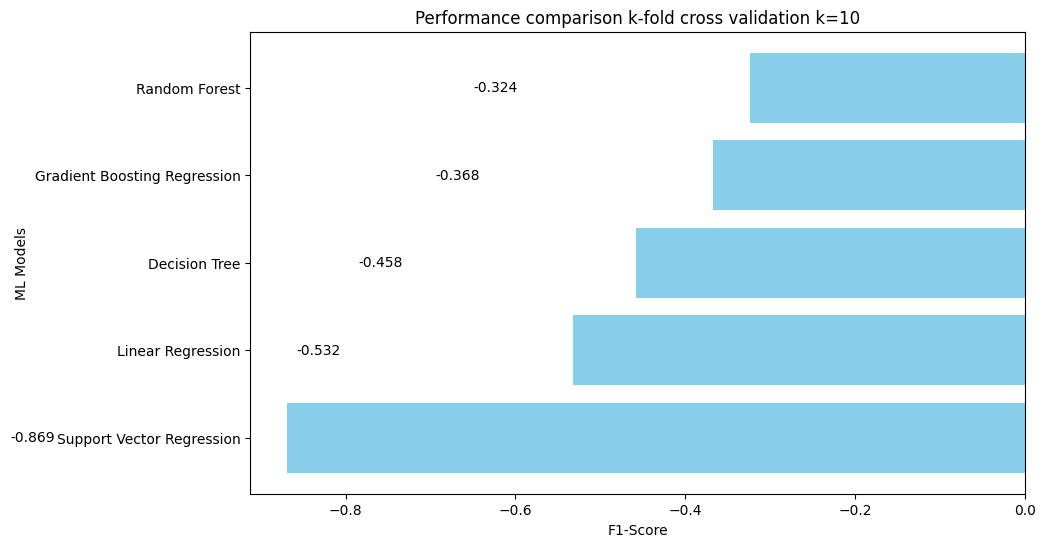

In [13]:
models = [model for model, _ in sorted_cross_val_scores]
scores = [score for _, score in sorted_cross_val_scores]

# Erstellt das Balkendiagramm
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('F1-Score')
plt.ylabel('ML Models')
plt.title('Performance comparison k-fold cross validation k=10')
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', ha='center', color='black')

plt.gca().invert_yaxis()  
plt.show()

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

The following variant does exactly the same thing, except that we now have the option of executing individual actions after each iteration.

In [15]:
all_fold_scores = {model: [] for model in ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Regression', 'Gradient Boosting Regression']}
placement_history = {model: [] for model in all_fold_scores.keys()}
mean_scores_history = {model: [] for model in all_fold_scores.keys()}  


#for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X,y), start=1): #for skf
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), start=1): #for kf
    print(f"Fold {fold_idx}:")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    linreg.fit(X_train, y_train)
    tree_reg.fit(X_train, y_train)
    rf_reg.fit(X_train, y_train)
    svr.fit(X_train, y_train)
    gb_reg.fit(X_train, y_train)
    
    linreg_predictions = linreg.predict(X_test)
    tree_reg_predictions = tree_reg.predict(X_test)
    rf_reg_predictions = rf_reg.predict(X_test)
    svr_predictions = svr.predict(X_test)
    gb_reg_predictions = gb_reg.predict(X_test)

    linreg_mae = mean_absolute_error(y_test, linreg_predictions)
    tree_reg_mae = mean_absolute_error(y_test, tree_reg_predictions)
    rf_reg_mae = mean_absolute_error(y_test, rf_reg_predictions)
    svr_mae = mean_absolute_error(y_test, svr_predictions)
    gb_reg_mae = mean_absolute_error(y_test, gb_reg_predictions)
    
    all_fold_scores['Linear Regression'].append(linreg_mae)
    all_fold_scores['Decision Trees'].append(tree_reg_mae)
    all_fold_scores['Random Forest'].append(rf_reg_mae)
    all_fold_scores['Support Vector Regression'].append(svr_mae)
    all_fold_scores['Gradient Boosting Regression'].append(gb_reg_mae)

    cross_val_scores_actual_fold = {
        'Linear Regression': linreg_mae,
        'Decision Trees': tree_reg_mae,
        'Random Forest': rf_reg_mae,
        'Support Vector Regression': svr_mae,
        'Gradient Boosting Regression': gb_reg_mae
    }
    
    
    sorted_cross_val_scores_actual_fold = sorted(cross_val_scores_actual_fold.items(), key=lambda x: x[1], reverse=False)

    for i, (model, score) in enumerate(sorted_cross_val_scores_actual_fold, start=1):
        rounded_score = round(score, 3)
        print(f"{i}. {model}: {rounded_score}")

    mean_scores = {model: np.mean(scores) for model, scores in all_fold_scores.items()}
    sorted_mean_scores = sorted(mean_scores.items(), key=lambda x: x[1], reverse=False)

    print()  
   
    for i, (model, mean_score) in enumerate(sorted_mean_scores, start=1):
        print(f"{i}. Average for {model} after {fold_idx} Folds: {round(mean_score, 3)}")
        placement_history[model].append(i)
        mean_scores_history[model].append(round(mean_score, 3))          
    print()




Fold 1:
1. Random Forest: 0.326
2. Gradient Boosting Regression: 0.367
3. Decision Trees: 0.453
4. Linear Regression: 0.542
5. Support Vector Regression: 0.873

1. Average for Random Forest after 1 Folds: 0.326
2. Average for Gradient Boosting Regression after 1 Folds: 0.367
3. Average for Decision Trees after 1 Folds: 0.453
4. Average for Linear Regression after 1 Folds: 0.542
5. Average for Support Vector Regression after 1 Folds: 0.873

Fold 2:
1. Random Forest: 0.322
2. Gradient Boosting Regression: 0.372
3. Decision Trees: 0.455
4. Linear Regression: 0.526
5. Support Vector Regression: 0.844

1. Average for Random Forest after 2 Folds: 0.324
2. Average for Gradient Boosting Regression after 2 Folds: 0.369
3. Average for Decision Trees after 2 Folds: 0.454
4. Average for Linear Regression after 2 Folds: 0.534
5. Average for Support Vector Regression after 2 Folds: 0.859

Fold 3:
1. Random Forest: 0.317
2. Gradient Boosting Regression: 0.363
3. Decision Trees: 0.466
4. Linear Regres

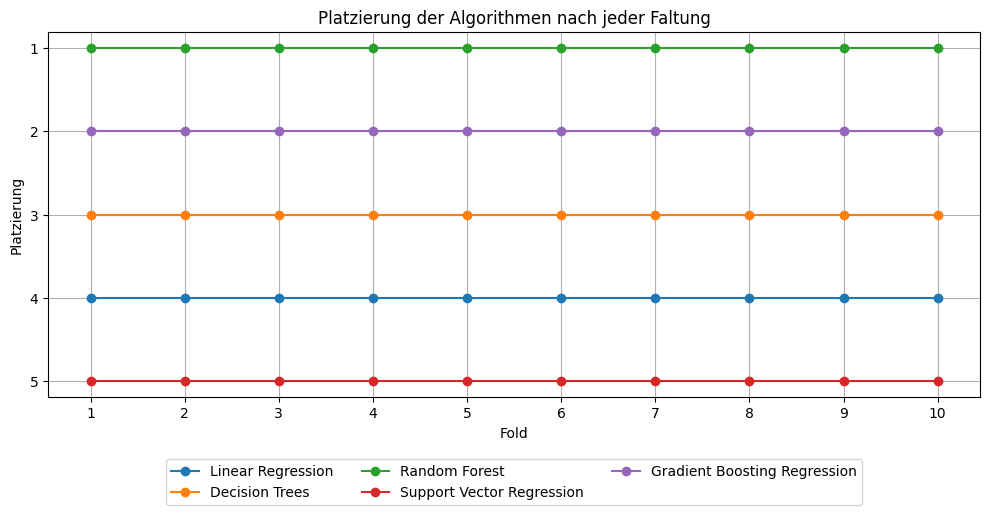

In [16]:
plt.figure(figsize=(10, 6))
for model, placements in placement_history.items():
    plt.plot(range(1, len(placements) + 1), placements, marker='o', label=model)

plt.gca().invert_yaxis()  
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.yticks(range(1, max(max(placements) for placements in placement_history.values()) + 1))  

plt.xlabel('Fold')
plt.ylabel('Platzierung')
plt.title('Platzierung der Algorithmen nach jeder Faltung')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


In [17]:
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [19]:
mae_rf = mean_scores_history['Random Forest']
mae_lr = mean_scores_history['Linear Regression']
mae_tree = mean_scores_history['Decision Trees']
mae_svr = mean_scores_history['Support Vector Regression']
mae_boost = mean_scores_history['Gradient Boosting Regression']

best_model_name = sorted_cross_val_scores[0][0]

if best_model_name == 'Random Forest':
    mae_best = mae_rf
elif best_model_name == 'Linear Regression':
    mae_best = mae_lr
elif best_model_name == 'Decision Trees':
    mae_best = mae_tree
elif best_model_name == 'Support Vector Regression':
    mae_best = mae_svr
elif best_model_name == 'Gradient Boosting Regression':
    mae_best = mae_boost



def find_earliest_significant_fold_ttest(mae_best, mae):
    for i in range(len(mae_best)):
        t_stat, p_value = ttest_ind(mae_best[:i+1], mae[:i+1],alternative='less')                                                                     
        if p_value < 0.05: 
            return i+1, p_value
    return None, None

def find_earliest_significant_fold_manwhitneyu(mae_best, mae):
    for i in range(len(mae_best)):
        t_stat, p_value = mannwhitneyu(mae_best[:i+1], mae[:i+1],alternative='less')  
                                                                                
        if p_value < 0.05: 
            return i+1, p_value
    return None, None


algorithms = {
            'Linear Regression': mae_lr,
            'Decision Trees': mae_tree,
            'Random Forest': mae_rf,
            'Support Vector Regression': mae_svr,
            'Gradient Boosting Regression': mae_boost
    }

print("T-Test:")
for algo_name, mae in algorithms.items():
    if mae_best != mae:
        fold, p_value = find_earliest_significant_fold_ttest(mae_best, mae)
        if fold:
            print(f"{best_model_name} is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

print("Mann-Whitney-U-Test:")
for algo_name, mae in algorithms.items():
    if mae_best != mae:
        fold, p_value = find_earliest_significant_fold_manwhitneyu(mae_best, mae)
        if fold:
            print(f"{best_model_name}  is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")


T-Test:
Random Forest is significantly better than Linear Regression from Fold 2 (p-Wert: 0.0002)
Random Forest is significantly better than Decision Trees from Fold 2 (p-Wert: 0.0000)
Random Forest is significantly better than Support Vector Regression from Fold 2 (p-Wert: 0.0001)
Random Forest is significantly better than Gradient Boosting Regression from Fold 2 (p-Wert: 0.0005)
Mann-Whitney-U-Test:
Random Forest  is significantly better than Linear Regression from Fold 4 (p-Wert: 0.0147)
Random Forest  is significantly better than Decision Trees from Fold 4 (p-Wert: 0.0147)
Random Forest  is significantly better than Support Vector Regression from Fold 4 (p-Wert: 0.0142)
Random Forest  is significantly better than Gradient Boosting Regression from Fold 3 (p-Wert: 0.0383)


### **Evaluation**

The results can be evaluated in three ways:<br>
1.interpretation of the diagram<br>
2.Statistical significance using t-tests<br>
3. statistical significance using the Mann-Whitney U-test<br>
<br>
1. in this data set, we can say with certainty in the **diagram** from the **1 fold** that Random Forest is the best algorithm.<br>
2. using the **T-test** we can also show from the **2 fold** that Random Forest is the best algorithm.<br>
3. using the **Mann-Whitney-U test** we can also show that Random Forest is the best algorithm from the **4 fold**.<br>